# Housing Price Trends and Factors in Current Day America

Table of Contents:
    
1. Rising Concerns for Housing
2. A Preliminary Look at the Data
3. MLR Model Creation and Diagonistics
4. *Later Thing*


By Eric Chi and Fox Davenport

# Rising Concerns for Housing

## Goal of Our Project

The project is trying to address the growing concern among Generation Z and Millennials regarding the increasing difficulty of homeownership due to rising housing prices and rental costs. This analysis aims to identify and quantify the various factors that influence housing prices and rent. The goal is to create a multiple linear regression model that can reasonably predict housing and rent prices, so that consumers can understand the trends in housing right now. With this new found knowledge, they can make more informed financial decisions. We will start by creating an MLR with all potential factors in our data. Using a combination of partial F-tests and ANOVAs, we will determine the significant predictors. Then we will establish a machine learning model to create and train MLRs before performing an F-test to determine the best model. Finally, we will check to make sure our model assumptions for MLR are satisfied before drawing conclusions.

## Why Housing?

Day after day, you constantly hear the news rerpot about the struggles that Generation Z and Millenials face. There is a growing shared sentiment amongst Generation Z and Millenials that the world is filled with dread and gloom. The world is becoming harder to survive and live in causing worries about the future. Housing is one of these issues with many people exclaiming how rent and housing prices only seem to go up. There are countless stories of people paying outrageous prices for poor living situations that would have been cheaper in the past. 

As students looking to work in the data science field this project allows us to practice our abilities in pattern recognition and data management for a topic which concerns us and our colleagues. I, Eric, am a math/economics major so a topic such as the housing market and the variables which can make the market fluctuate has a direct tie into my studies in business and mathematical modeling. I, Fox, am a financial actuarial math major so the analysis of contributing factors to an economic trend will be part of my daily work life in the future. One of our personal greatest fears is being able to secure a comfortable and proper living after college. Housing is crucial for that lifestyle and understanding the general trends that affect housing prices/rental costs will give us an advantage in decision making when we enter the housing market.

# A Preliminary Look at the Data

Our data was taken from Kaggle and is extensive housing data for the Ames, Iowa region. Necessary precautions will be taken to prevent overfitting and try to make it relatively generalizable to the rest of the USA. Already provides us with training and testing data

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [10]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow.keras import layers, initializers, utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [11]:
# Read in our data. Already given training and test ones
train_data = pd.read_csv('https://github.com/FoxDavenport/PIC16BFinalProject/blob/main/train.csv?raw=true')

test_data = pd.read_csv('https://github.com/FoxDavenport/PIC16BFinalProject/blob/main/test.csv?raw=true')

## Data Exploration and Processing 

Let's observe what information our dataset contains, how it's structued, and what it looks like.

In [14]:
# Get the shape of our data
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


The training data has 1460 houses and 81 features for each house. We will use all entries from the training data as the size is small enough that crashes shouldn't occur. 

Note that the test data has 1459 houses and 80 features for each house. The test data has one less feature becaue it does not include the sales price for the houses, which is the output feature. The testing data only has the input features.

Let us examine to see what features are potential factors for our housing price.

In [17]:
# Gets column names
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We now know what features are in our dataset, but we don't know what sort of information they hold. Let's take a look at the entire dataset and see what type of outputs each feature gives.

In [19]:
# show first 5 rows of the dataframe and all columns
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We now can see the type of outputs each feature has with some being categorical and others being numerical. 

Certain houses do not have applicable fields to them for some of the features. The Alley, MasVnrType, PoolQC, Fence, and MiscFeature columns all have NaNs. We will then remove these as they will mess with the data. Furthermore, my partner and I deemed these as marginally important. We really wanna focus on the big contributing factors of a house in our eyes: the location, time, size, interior, and materials.

The following will be the columns we wanna keep for our training and testing data.

In [21]:
# List of columns to keep
columns_to_keep = [
    'SalePrice', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Foundation', 
    'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 
    'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondition'
]

# Keep columns we specified for training_data
train_data = train_data[columns_to_keep]

# Remove 'SalePrice' from columns_to_keep. Need to do this because our test_data only has input features.
# It does not have SalePrice, the output feature
columns_to_keep.remove('SalePrice')
test_data = test_data[columns_to_keep]

Now, let's make sure we don't have any NaNs left in our training and testing data

In [23]:
# find sums of NaNs in dataset if there are any
print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())

0
0


Our data no longer has any NaNs left. Let's now check the size of our training and testing data.

In [25]:
# Show new training data results
print(train_data.shape)
print(test_data.shape)

(1460, 43)
(1459, 42)


Our new training data after removing the unnecessary columns has 43 features for 1460 houses and our new testing data has 42 features for 1459 houses.

Let us now visualize our training data and see the entire dataset with the new number of features.

In [27]:
train_data.head()

,SalePrice,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Foundation,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleCondition
0,208500,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,PConc,GasA,Ex,Y,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,2,2008,Normal
1,181500,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,CBlock,GasA,Ex,Y,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,5,2007,Normal
2,223500,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,PConc,GasA,Ex,Y,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,9,2008,Normal
3,140000,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,BrkTil,GasA,Gd,Y,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,2,2006,Abnorml
4,250000,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,PConc,GasA,Ex,Y,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,12,2008,Normal


We still do not know exactly what units some of these numerical features are in. Additionally, some categorical features have weid abbreviations that we do not know the current meaning of. We will now define all of them, so that there is no confusion on what each feature represents. 

**SalePrice:** the property's sale price in dollars. This is the target variable that we're trying to predict.

**MSSubClass:** The building class

**LotArea:** Lot size in square feet

**Street:** Type of road access

**LotShape:** General shape of property

**LandContour:** Flatness of the property

**LotConfig:** Lot configuration

**LandSlope:** Slope of property

**Neighborhood:** Physical locations within Ames city limits

**Condition1:** Proximity to main road or railroad

**Condition2:** Proximity to main road or railroad (if a second is present)

**BldgType:** Type of dwelling

**HouseStyle:** Style of dwelling

**OverallQual:** Overall material and finish quality

**OverallCond:** Overall condition rating

**YearBuilt:** Original construction date

**YearRemodAdd:** Remodel date

**RoofStyle:** Type of roof

**RoofMatl:** Roof material

**Foundation:** Type of foundation

**Heating:** Type of heating

**HeatingQC:** Heating quality and condition

**CentralAir:** Central air conditioning

**1stFlrSF:** First Floor square feet

**2ndFlrSF:** Second floor square feet

**LowQualFinSF:** Low quality finished square feet (all floors)

**GrLivArea:** Above grade (ground) living area square feet

**FullBath:** Full bathrooms above grade

**HalfBath:** Half baths above grade

**Bedroom:** Number of bedrooms above basement level

**Kitchen:** Number of kitchens

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**Fireplaces:** Number of fireplaces

**PavedDrive:** Paved driveway

**WoodDeckSF:** Wood deck area in square feet

**OpenPorchSF:** Open porch area in square feet

**EnclosedPorch:** Enclosed porch area in square feet

**3SsnPorch:** Three season porch area in square feet

**ScreenPorch:** Screen porch area in square feet

**MiscVal:** Value of miscellaneous feature

**MoSold:** Month Sold

**YrSold:** Year Sold

**SaleCondition:** Condition of sale

Now we will separate our data into two lists. One for numeric variables and the other for categorical variables. We will iterate a for loop where if the columns of a dataframe have an integer or float in it, then it is numerical. Otherwise, it is categorical. This is so that we can easily analyze each type of variables and not perform functions on columns where it doesn't make sense. We will begin a preliminary analysis of the data through various plots before creating a model of it.

In [30]:
# Create empty lists to store our numeric and categoical variables
numeric_vars = []
categorical_vars = []

# Loop through the columns of the dataframe, if the type of the column is int or float, it is numeric. if not, it is categorical
for col in train_data.columns:
    if train_data[col].dtype == np.float64 or train_data[col].dtype == np.int64:
        numeric_vars.append(col)
    else:
        categorical_vars.append(col)

print('Numeric variables:', numeric_vars)
print('Categorical variables:', categorical_vars)

Numeric variables: ['SalePrice', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']
Categorical variables: ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition']


Let us now then get some summary statistics for our numeric variables and then make some distribution plots.

In [32]:
train_data.describe() #get summary statistics

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1162.626712,346.992466,5.844521,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753
std,79442.502883,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,386.587738,436.528436,48.623081,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095
min,34900.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,129975.000000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,882.000000,0.000000,0.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,163000.000000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1087.000000,0.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,214000.000000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,728.000000,0.000000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,755000.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

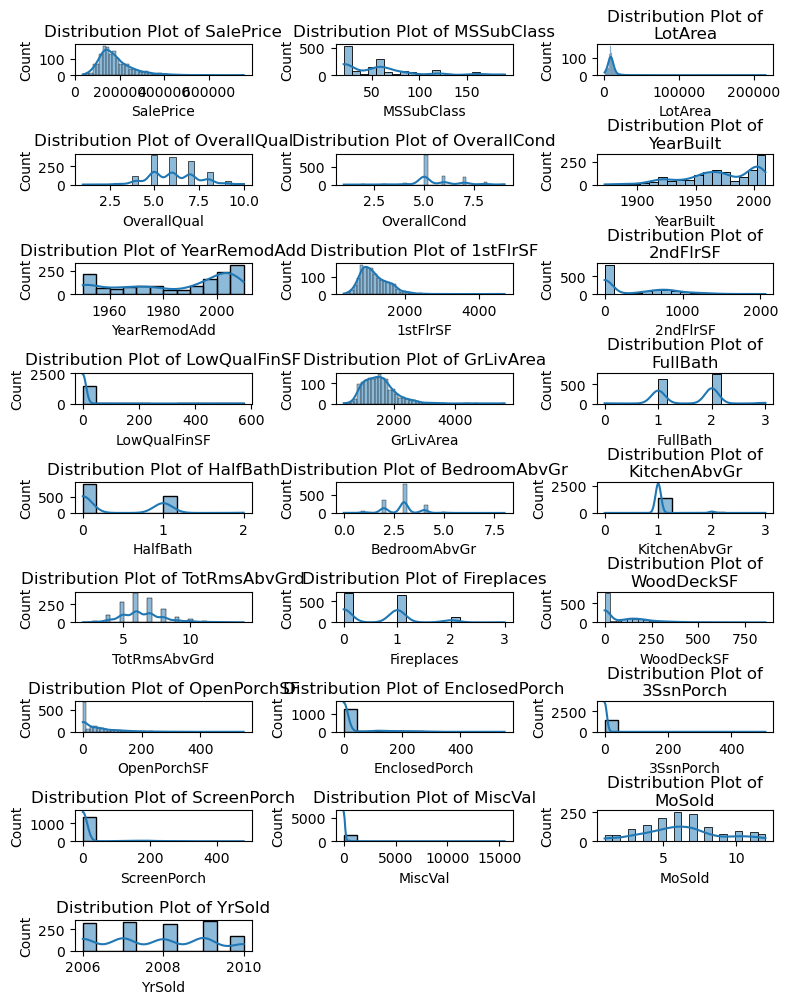

In [33]:
# Want to plot our distribution plots. Credits to code goes to sample 16B Project

# Get the number of rows and cols
n_cols = len(numeric_vars)
n_rows = int(np.ceil(n_cols / 3))

# set up the plot
fig, axes = plt.subplots(n_rows, 3, figsize=(8, 10))

# Loop through the numeric variables and plot the distributions
for i, col in enumerate(numeric_vars):
    row_idx = i // 3
    col_idx = i % 3
    sns.histplot(train_data[col], ax=axes[row_idx, col_idx], kde=True)

    axes[row_idx, col_idx].set_title(f"Distribution Plot of {col}", wrap=True)
    axes[row_idx, col_idx].set_xlabel(col)

# format the plot
for i in range(n_cols, n_rows*3):
    fig.delaxes(axes.flatten()[i])

fig.tight_layout()

plt.show()

From our distribution plots, we can see that the sale price has a skewed normal distribution. This is also backed up by our summary statistics where the mean price is 180921.195890 and the 75 percentile is 214000.000000. The sale price is concentrated in that area indicating that the houses sold seem to be fairly similar to one another, which makes sense as they are all houses sold in a particular area.

There are some concernig distributions plots such as LotArea, KitchenAbvGr, 3SsnPorch, MiscVal, ScreenPorch, EnclosedPorch, and LowQualFinSF. All of these are heavily concentrated distribution plots to the left indicating that there is little variability in these amongst the houses. This is furthermore backed up by their summary statistics as their standard deviation is relatively small and the 25% and 75% percentile are relatively close to the mean. These then might not be good predictors tod etermine the sales price of a house.

All the other variables are distributed out enough that they seem to have some sort of impact on the sales price

We will now use a bar graph w/ correlation matrix to see how sales price is affected by these numerical predictors. This will generally allow us to see how impact the numerical predictors are on sales price. However, we still will need to perform partial F-tests and ANOVAs to be sure.

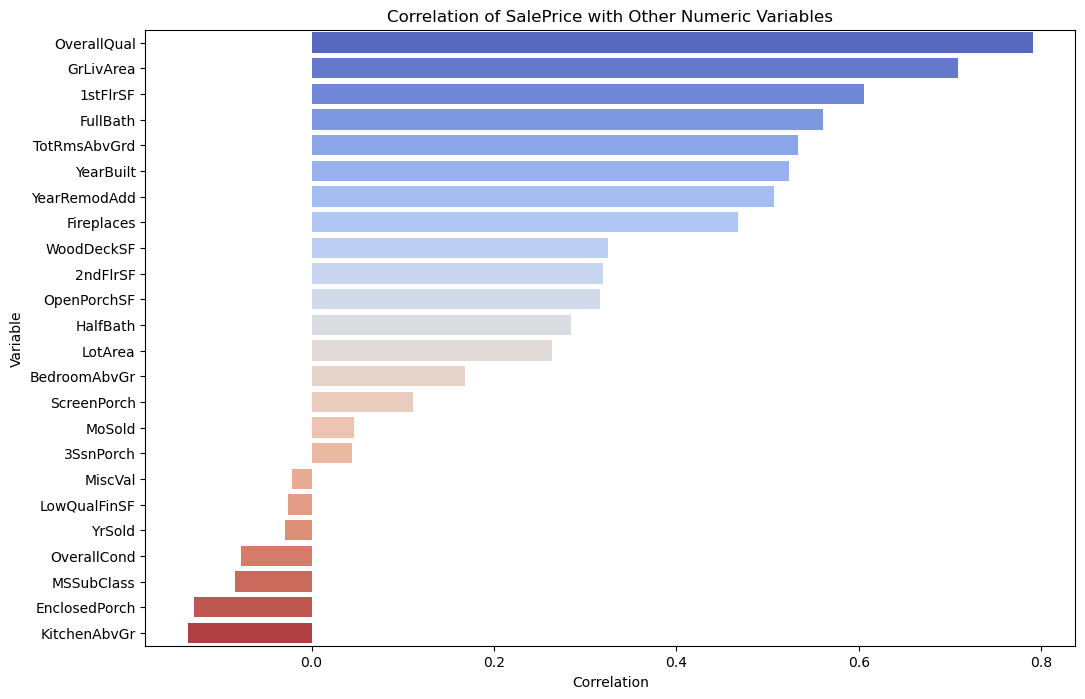

In [35]:
# Select only numeric columns
num_cols_corr = train_data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_data = num_cols_corr.corr()

# Get the correlation of 'SalePrice' with all other numeric variables, excluding self-correlation
sales_price_corr = corr_data["SalePrice"].drop('SalePrice').sort_values(ascending=False)

# Convert to DataFrame for plotting
sales_price_corr_df = sales_price_corr.to_frame().reset_index()
sales_price_corr_df.columns = ['Variable', 'Correlation']

# Plotting the 'SalePrice' correlations using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Variable', data=sales_price_corr_df, palette='coolwarm')
plt.title('Correlation of SalePrice with Other Numeric Variables')
plt.show()

From our barplot, we can see that OverallQual, GrLiveArea, 1stFlrSF, Full Bath, TotRmsAbvGrd, YearBuilt, and YearRemodAdd all have relatively high positivie correlation coefficients with SalePrice. The rest have minimal correlation with SalePrice.

MiscVal, LowQualFinSF, YrSold, OverallCond, MSSubClass, EnclosedProch, and KitchenAbvGr even have negative correlation w/ Sale Price. 

We should then visualize our data frame of correlation coefficients to take a further look at this.

The barplot of our correlation coefficients does help us have a rough idea of what predictors should be significant and which should not be.

In [37]:
# See our entire dataframe for the correlation that each numeric variable has with sales price
sales_price_corr_df

,Variable,Correlation
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,1stFlrSF,0.605852
3,FullBath,0.560664
4,TotRmsAbvGrd,0.533723
5,YearBuilt,0.522897
6,YearRemodAdd,0.507101
7,Fireplaces,0.466929
8,WoodDeckSF,0.324413
9,2ndFlrSF,0.319334


The negative correlation coefficients are indeed relatively small. 

Now that we have a rough idea of our numerical variables and sales price relationship, let us take a look at the categorical variables.

In [39]:
# See how many categorical variables we have left
len(categorical_vars)

18

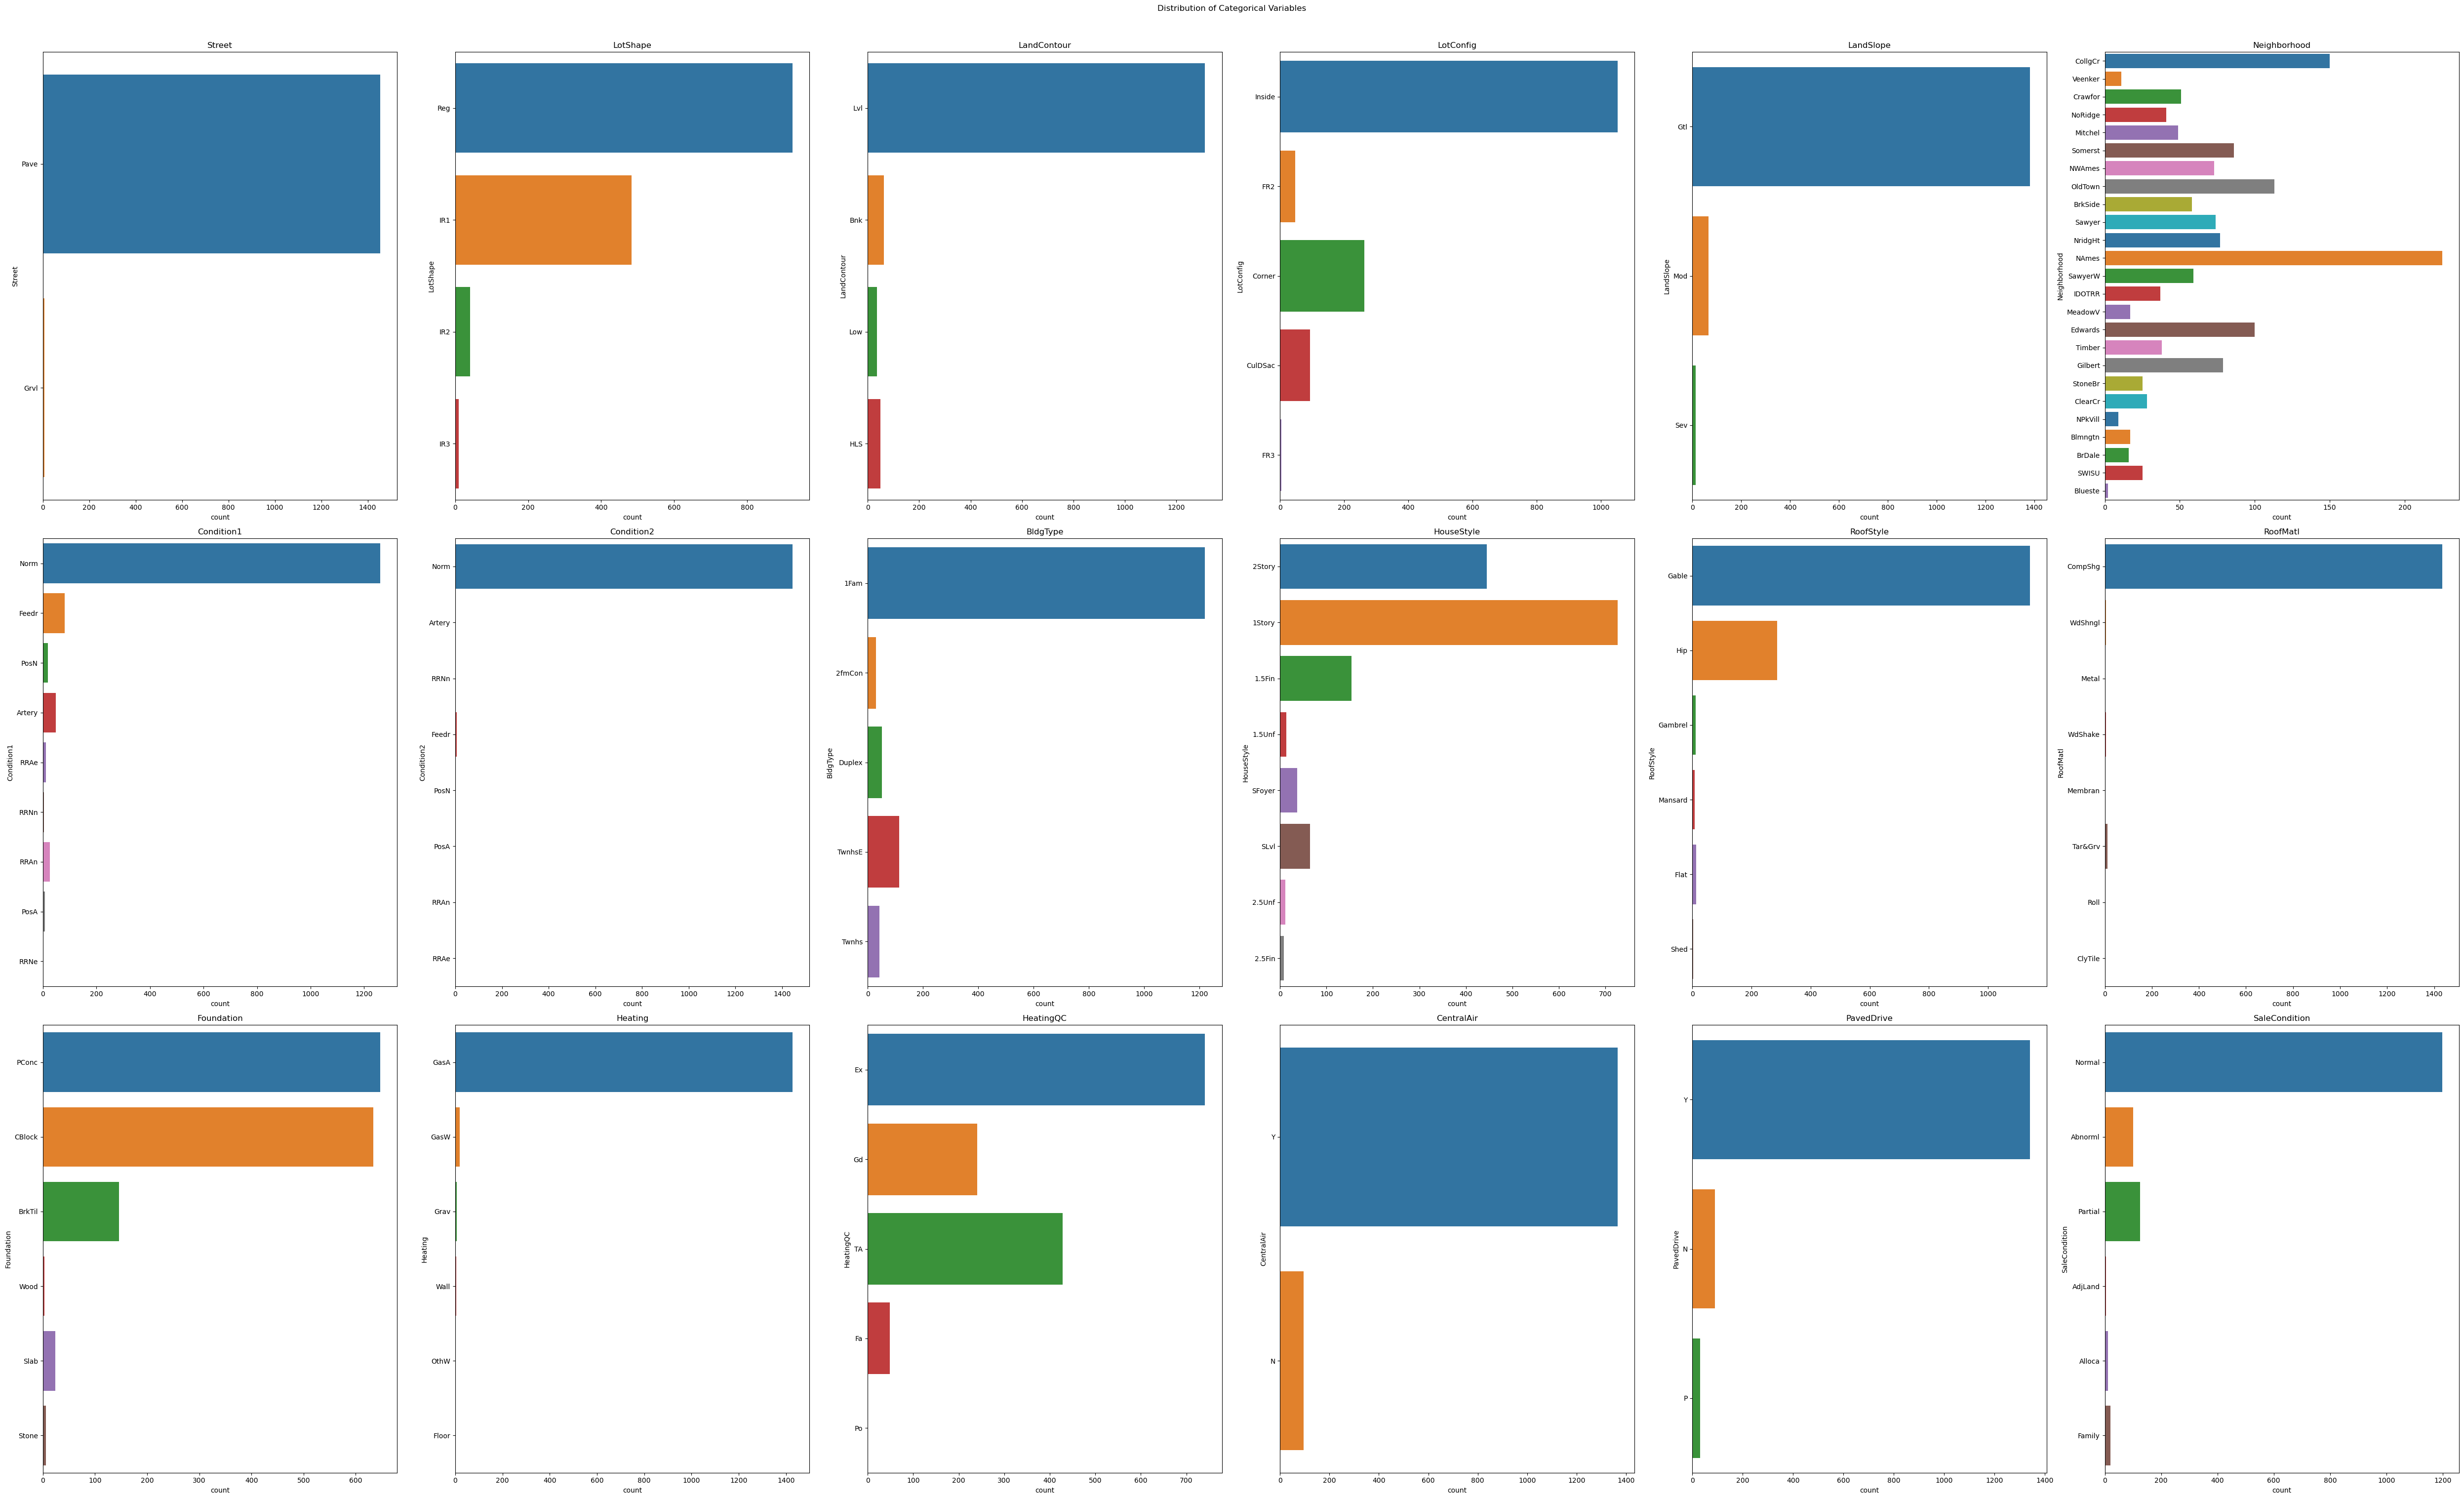

'for column in categorical_vars:\n    plt.figure(figsize=(10, 6))\n    sns.countplot(x=column, data=train_data.loc[:,categorical_vars])\n    plt.title(column)'

In [40]:
# Loop through the categorical columns and plot the distributions on one figure
fig, axes = plt.subplots(3, 6, figsize=(50, 30))

for i, col in enumerate(categorical_vars):
    row_idx = i // 6
    col_idx = i % 6
    sns.countplot(y=train_data[col], ax=axes[row_idx, col_idx], palette='tab10')
    axes[row_idx, col_idx].set_title(f"{col}", wrap=True)
    axes[row_idx, col_idx].set_ylabel(col)

for i in range(len(categorical_vars), 3*6):
    fig.delaxes(axes.flatten()[i])
    

fig.suptitle('Distribution of Categorical Variables', y=1.01)
fig.tight_layout()
plt.show()

"""for column in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=train_data.loc[:,categorical_vars])
    plt.title(column)"""

We can see that most of our houses are on a pavement street, have a regular lot shape, a level land contour, inside LotConfig, Gtl LandSlope, normal building condition,  1 story house, 1FAM building type, Gable roof style, CompShg roof material, GasA heating, Ex HeatingQC, paved drive, and normal SaleConditon.

Neighborhood is the most varying of the categorical variables with it roughly following a normal distribution. HeatingQC, Foundation, and HouseStyle also have enough variance in their distributions. We then expect that these will have a bigger impact on the sales price of a house because of the added variance of them against the most common type of house.

We will now then see the average sales price for each categorical variable categories.

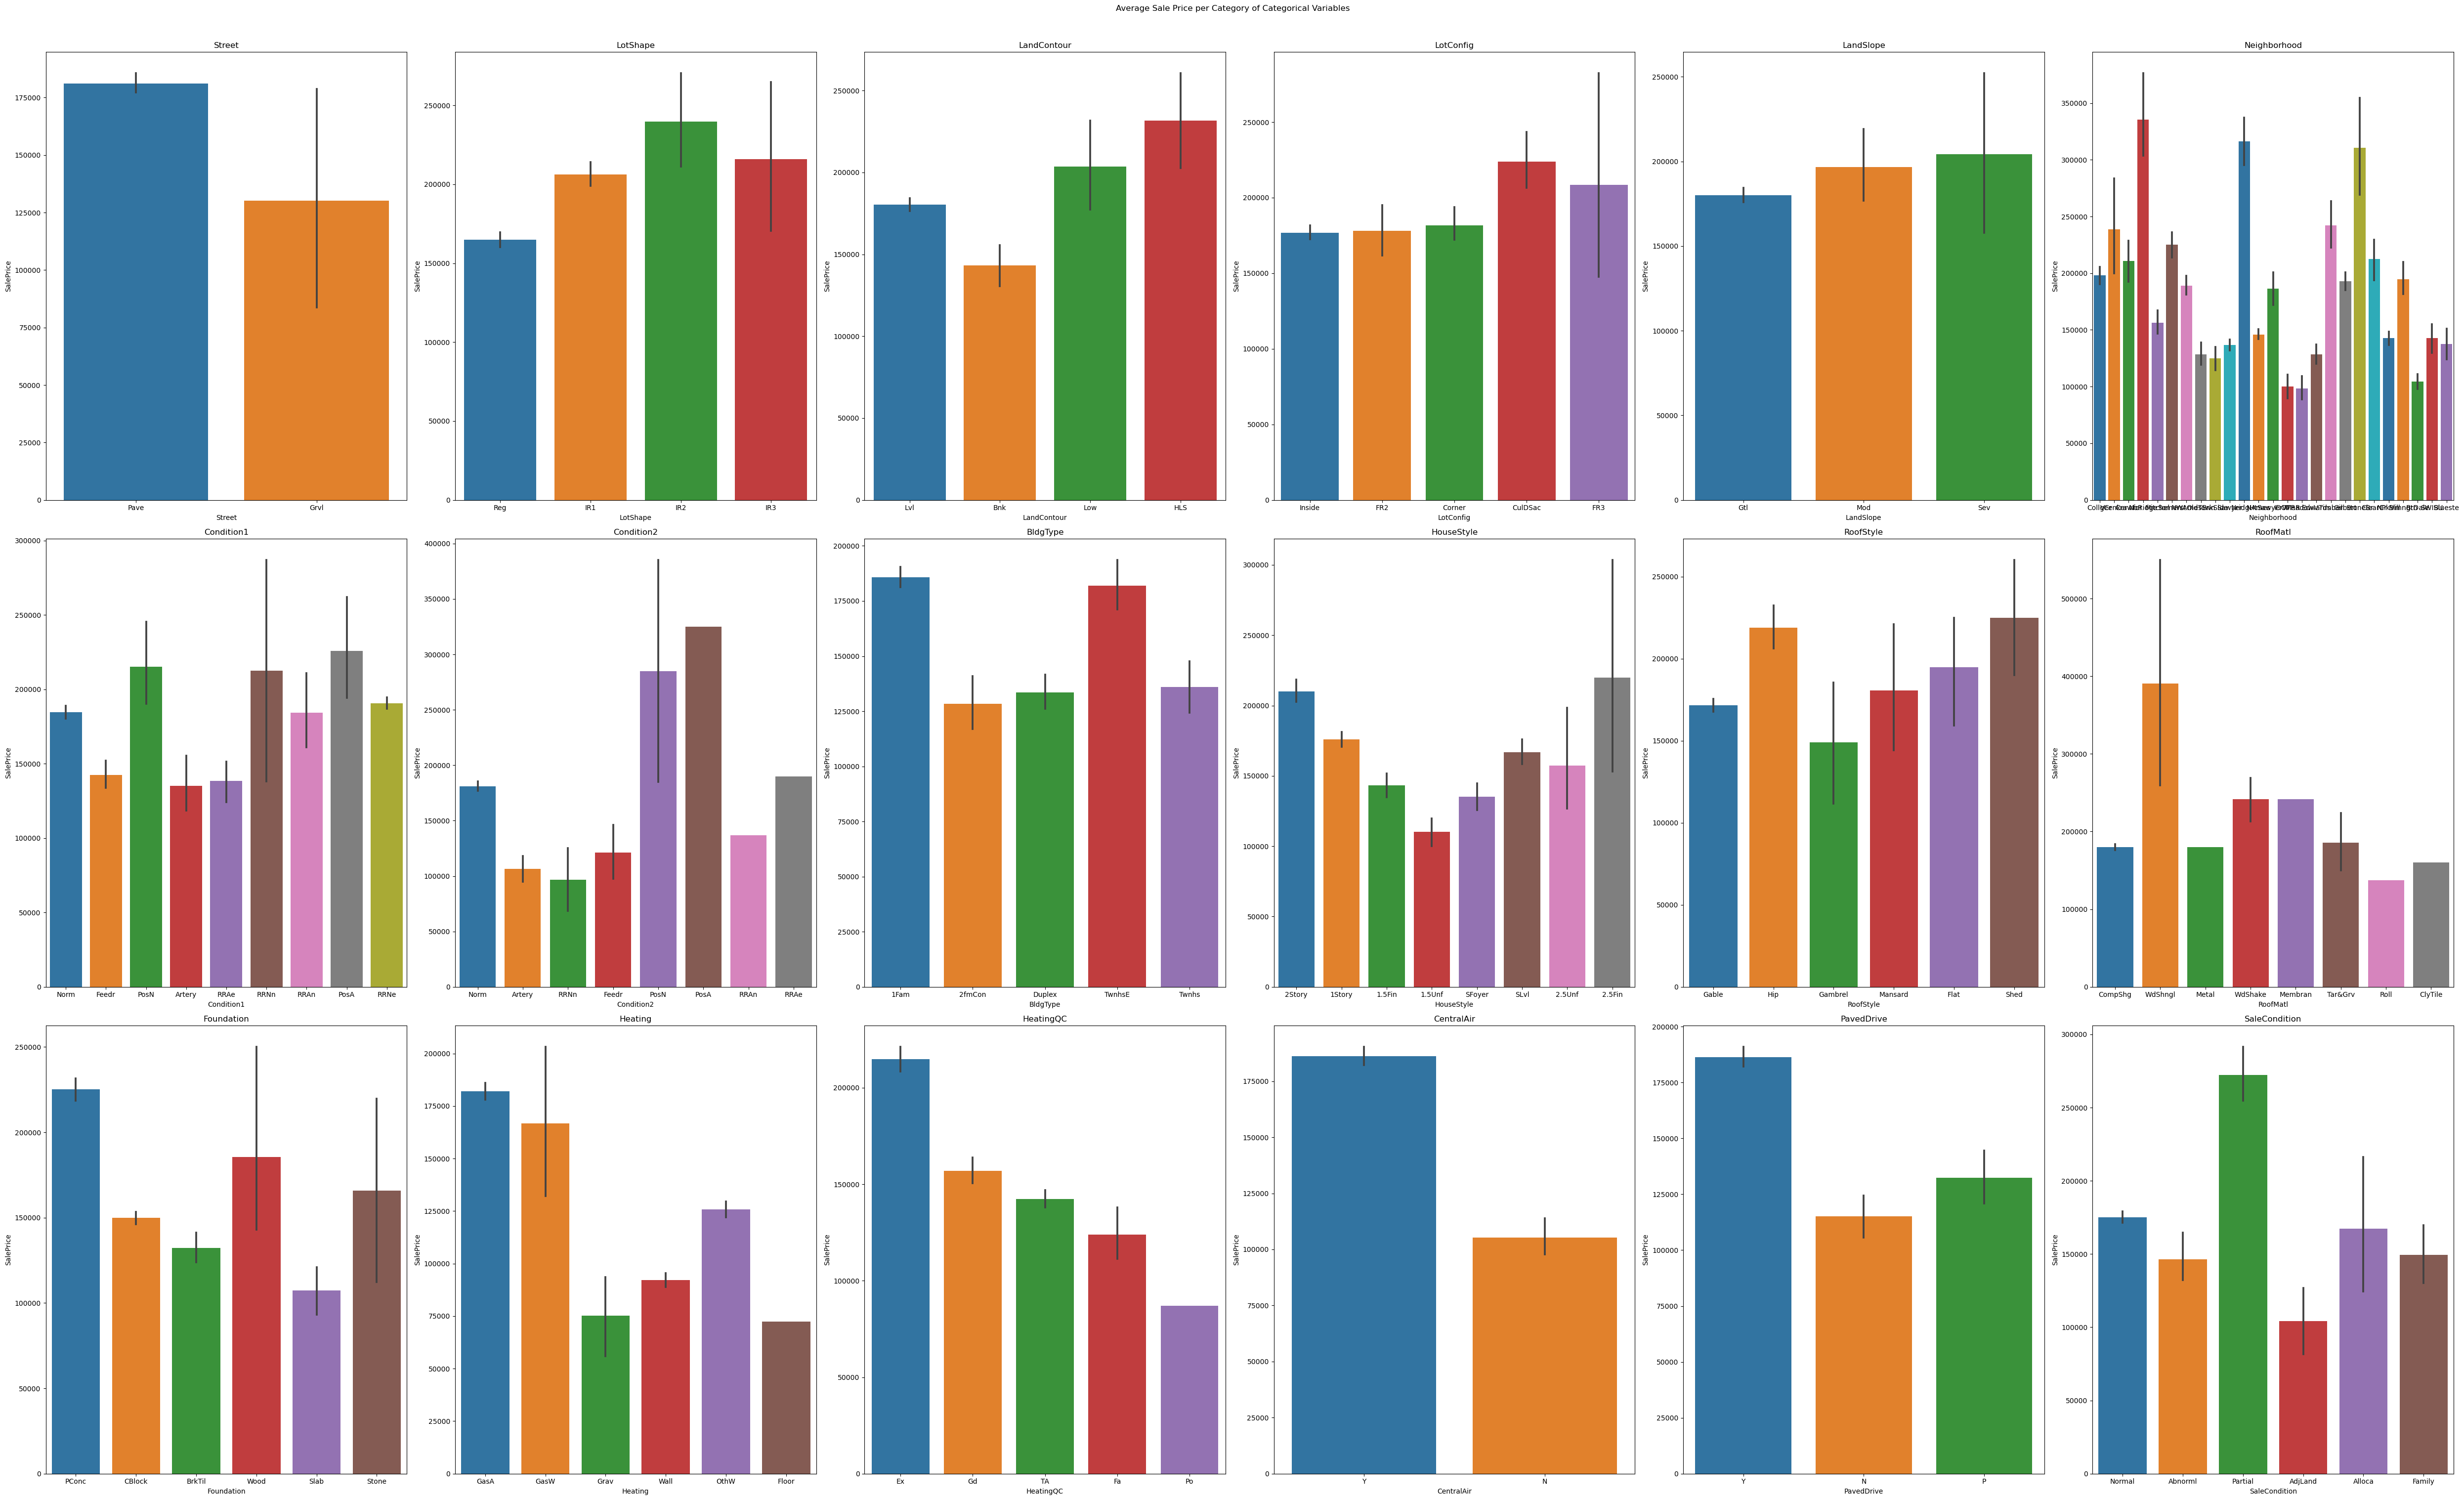

"\nfor column in categorical_vars:\n    dataset=train_data.copy()\n    plt.figure(figsize=(10, 6))\n    sns.barplot(x=column, y=dataset['SalePrice'], data=dataset, estimator=np.mean)\n    plt.show()"

In [42]:
# Loop through the categorical variables and plot the average sales price per category and plot on one figure
fig, axes = plt.subplots(3, 6, figsize=(50, 30))

for i, col in enumerate(categorical_vars):
    row_idx = i // 6
    col_idx = i % 6
    sns.barplot(x=col, y='SalePrice', data=train_data, ax=axes[row_idx, col_idx], palette='tab10')
    axes[row_idx, col_idx].set_title(f"{col}", wrap=True)
    axes[row_idx, col_idx].set_ylabel('SalePrice')

for i in range(len(categorical_vars), 3*6):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Average Sale Price per Category of Categorical Variables', y=1.01)
fig.tight_layout()
plt.show()


"""
for column in categorical_vars:
    dataset=train_data.copy()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y=dataset['SalePrice'], data=dataset, estimator=np.mean)
    plt.show()"""

From these results, it seems that the sale price of a house is relatively impacted by a moderate amount from our categorical variables. There are differences in sales price via the categorical variables, but not a big enough difference that makes there seem to be an indication of high correlation with sale price. The street having a pavement, SaleCondition, CentralAir, HeatingQC, and Heating seem to have the biggest variations in their average sale prices.

Our explanatory analysis indicates that our quantitative predictors are moderately correlated with sale price, but not strongly. There is no clear category that seems to be a significant or strong predictor for sale price.

# MLR Model Creation and Diagonistics

## Feature Importance Selection Via Algorithms

Our goal is to create an MLR model which outputs predicted sales price. To do so, we need to find important features which we use to adequately train our model. Thus, our next step is feature selection. To do so we will look at different algorithms which give us a feature importance score.

The first algorithm we will train is a RF Classifier. Lets prepare the training data into train-test split for the RF algorithm

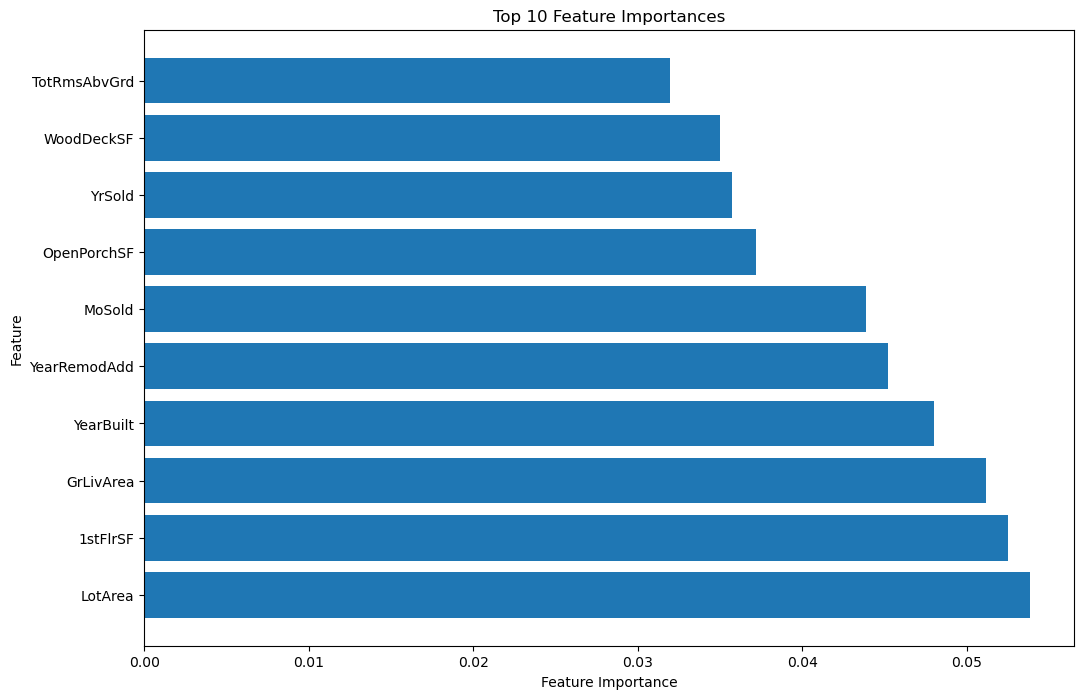

In [48]:
#Finding important features using Random Forest Classifier
# Get the numeric columns
num_cols = train_data.select_dtypes(include=['int64', 'float64'])

# Get the categorical columns
cat_cols = train_data.select_dtypes(include=['object'])

# One-hot encode the categorical columns
cat_cols = pd.get_dummies(cat_cols)

# Concatenate the numeric and one-hot encoded categorical columns
train_data = pd.concat([num_cols, cat_cols], axis=1)

# Split the data into input features and target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Get the indices of the top 10 importances
indices = np.argsort(importances)[::-1][:10]

# Get the feature names
feature_names = X_train.columns

# Get the top 10 feature names
top_10_features = feature_names[indices]

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_10_features, importances[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

Through our Random Forest Algorithm we find that the most important features consist of Lot Area, 1st Floor square feet, year built, or year sold. These make sense as land is heavily correlated to the size of the land and how new the home is. One feature we need to keep an eye on when training our model is Year Sold. This is the case as with the trend of the housing market, a newly sold home would have a higher sale price regardless of its other features. 

However, we should also see if other algorithms get the same or similar results. We will now run a decision tree algorithm to see the top 10 most important features.

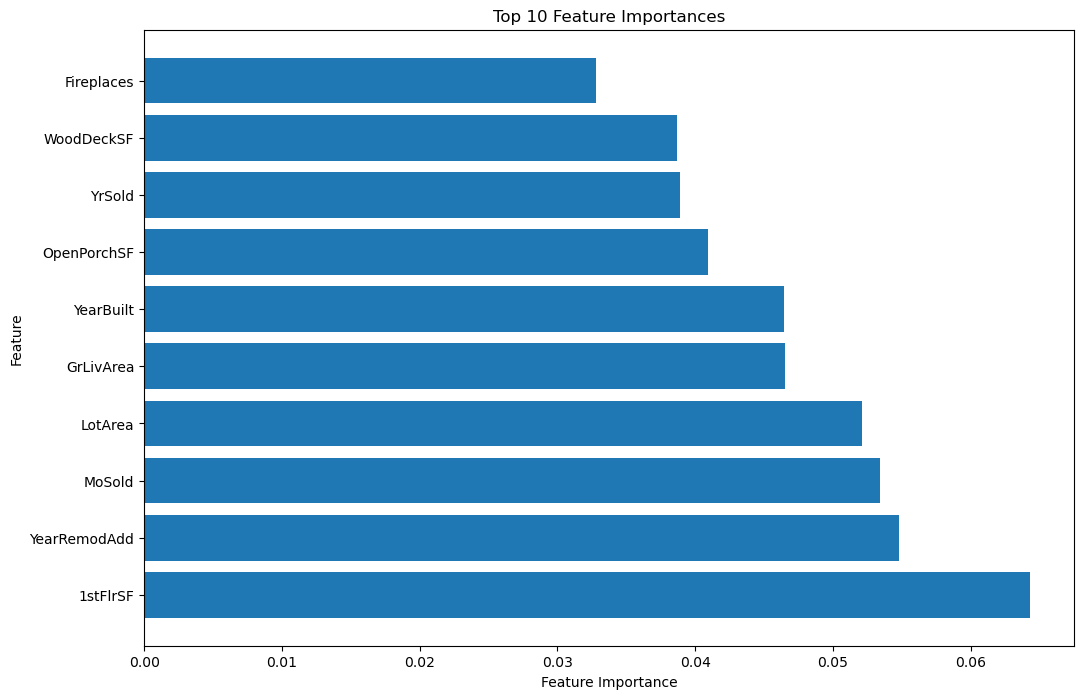

In [50]:
#decision tree algorithm for importance of features
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.tree import export_text

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

# Get the feature importances

importances = dt.feature_importances_

# Get the indices of the top 10 importances

indices = np.argsort(importances)[::-1][:10]

# Get the feature names
feature_names = X_train.columns

# Get the top 10 feature names
top_10_features = feature_names[indices]

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_10_features, importances[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

We found that the top 10 feature importances in both models are the same just in slight different orders. Along with the fact that the order is different in terms of importance than our correlation data when comparing it to sales price directly. That is the importancce in looking at different algorithms and correlation testers.

Now that we have our initial features from our algorithms we can start to create our MLR model. Of course we will be monitoring the performance of the model and making changes to the features and model itself but this should act as a good starting point.

Below is our MRL model with our top 10 numerical features. We will use a significance level of 0.05 to evaluate our model.

In [52]:
# Initializing variables for our MLR model with our top 10 numerical features

top_10_features

X = train_data[top_10_features]
y = train_data['SalePrice']

X = sm.add_constant(X)

MLRmodel = sm.OLS(y, X)

full_algorithm = MLRmodel.fit()

print(full_algorithm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     364.5
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:06:04   Log-Likelihood:                -17626.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1449   BIC:                         3.533e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.47e+06   1.71e+06     -0.861   

We can see from our results that the model is overall significant using the 10 most important features indicated by the probability of the F-statistic being 0.00, which is smaller than our chosen significance level of 0.05. 

We can also see that the predictors of 1stFlrSF, YearRemodAdd, GrLivArea, LotArea, YearBuilty, and WoodDeckSF are significant as their p-values are smaller than the significance level of 0.05. Furthermore, their confidence intervals do not contain the value of 0 indicating that these predictors have a significant impact on the sales price of a house. We are 95% confident that these predictors have a non-zero impact on the sales price of the houses.

The constant, MoSold, OpenPorchSF, YrSold, and TotalRmsAbvGrd have p-values above the significance level of 0.05 and their confidence intervals do contain the value of 0. Hence, these predictors are not shown to be significant. 

However, this now raises the question of if a model without the non-significant predictors would be better or not. To test this, we will perform a partial F-test. The partial F-test compares two nested regressional models to determine if the additional predictors provide a more significant model or not. Our null hypothesis will be all coefficients removed from our full model are zero meaning that they are not significant. Thus, our null hypothesis means that removing the non-significant predictors from the full does not improve the original model.

First, let us create the reduced model and see its summary.

In [54]:
# Define the reduced model with only the significant predictors. Then run MLR on it and spit out the summary
significant_features = ['1stFlrSF', 'YearRemodAdd', 'GrLivArea', 'LotArea', 'YearBuilt', 'WoodDeckSF']
X_reduced = train_data[significant_features]
X_reduced = sm.add_constant(X_reduced)
reduced_model = sm.OLS(y, X_reduced).fit()

print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:06:05   Log-Likelihood:                -17652.
No. Observations:                1460   AIC:                         3.532e+04
Df Residuals:                    1453   BIC:                         3.536e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.547e+06   1.16e+05    -21.962   

We can see that our overall model is significant as the probability of the F-statistic is 0, which is less than the significance level of 0.05. Every predictor is also significant as their p-values are below the significance level of 0.05 and that the value 0 is not included in their confidence intervals.

Now that we see our reduced model is competitive to our model with the 10 most important factors, we can perform the partial F-test to see which model is better.

In [56]:
# Perform the partial F-test
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(reduced_model, full_algorithm)

print("\nANOVA Results:")
print(anova_results)


ANOVA Results:
   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0    1453.0  2.714657e+12      0.0           NaN        NaN           NaN
1    1449.0  2.619453e+12      4.0  9.520491e+10  13.166102  1.544315e-10


The 0 here represents our reduced model and the 1 here represents the model with the 10 most important factors. We can see that we obtained a p-value of 0.215013, which is greater than our significance level of 0.05. Hence, we fail to reject our null hypothesis. Recall that our null hypothesis was that removing the non-significant predictors from the full does not improve the original model.

We fail to reject this. Thus, our reduced model is not an improved model. We will continue to use the full model from the algorithms then (continue to use full_algorithm).

## Feature Importance Selection via Partial F-test Comparisons from the Entire Training Data

Before we move on though, let's see how an MLR is with all of our kept numerical and categorical variables from our preliminary data analysis. That way we can ensure that our Random Forest and Decision Tree Algorithm didn't accidentally overlook any other significant predictors for sales price. 

In [60]:
# Define an MLR model with all the numerical and categorical variables from our preliminary dat analysis.
# Massive amount of predictors for this model. Should be 42 of predictors for sales price based on our data shape previously

# Our training data currently has one-hot encoded categorical columns. These are booleans, so we should convert these into 
# 1s for true and 0s for false for ease of using them.
train_data = train_data.replace({True: 1, False: 0})

# Now let's create our MLR model
X_entire = train_data.drop('SalePrice', axis=1)
y_entire = train_data['SalePrice']

X_entire = sm.add_constant(X_entire)

Entire_Model = sm.OLS(y, X_entire).fit()

print(Entire_Model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     85.23
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:06:05   Log-Likelihood:                -16970.
No. Observations:                1460   AIC:                         3.418e+04
Df Residuals:                    1339   BIC:                         3.482e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.828e+

Even our entire model before finding the most important predictors is still significant overall. We can see this from the p-value of the F-statistic being 0.00, which is less than our significance level of 0.05. 

The significant predictors with a p-value less than the significance level of 0.05 and without the value of 0 in its confidence interval are: LotArea, OverallQual, OverallCond, YearBuilt, 1stFlrSF, 2ndFlrSF, GrLivArea, BedroomAbvGr, KitchenAbvGr, Fireplaces, WoodDeckSF, ScreenPorch, MoSold, Neighborhood_Blmngtn, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NWAmes, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_Sawyer, Neighborhood_StoneBr, Condition2_PosN, Condition2_RRAe, HouseStyle_2.5Fin, RoofMatl_ClyTile, and RoofMatl_WdShngl.

All the other predictors are not significant. As we can see, the entire full model with all considered numerical and categorical variables has a lot of significant predictors that were not caught by the Random Forest and Decision Tree Algorithm. We should now then conduct another partial F-test using only the significant predictors from here vs the full model. Let's take a look at the reduced model first.

In [62]:
# Define the reduced model with only significant predictors
significant_predictors = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', 
                          '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
                          'WoodDeckSF', 'ScreenPorch', 'MoSold', 'Neighborhood_Blmngtn', 
                          'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 
                          'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 
                          'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 
                          'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 
                          'Condition2_PosN', 'Condition2_RRAe', 'HouseStyle_2.5Fin', 
                          'RoofMatl_ClyTile', 'RoofMatl_WdShngl']

X_reduced = X_entire[significant_predictors]

# Add constant to the reduced model
X_reduced = sm.add_constant(X_reduced)

# Fit the reduced model
reduced_model2 = sm.OLS(y_entire, X_reduced)
reduced_model2 = reduced_model2.fit()
print(reduced_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     255.7
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:06:05   Log-Likelihood:                -17172.
No. Observations:                1460   AIC:                         3.441e+04
Df Residuals:                    1428   BIC:                         3.458e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.184e+06 

We run into an issue here where the overall model is still significant with the p-value of the F-statistic being 0.00 < 0.05. However, some of our previously significant predictors are no longer significant. Let us first perform the partial F-test between the two models to find the better one and then reassess from there.

In [64]:
# Perform partial F-test
print(anova_lm(reduced_model2, Entire_Model))

   df_resid           ssr  df_diff       ss_diff         F        Pr(>F)
0    1428.0  1.405770e+12      0.0           NaN       NaN           NaN
1    1339.0  1.065946e+12     89.0  3.398239e+11  4.796333  5.579211e-38


We can see that the p-value from our partial F-test results in a value smaller than 0.05. Thus, we reject the null hypothesis. Then that means we find our reduced model more significant than our entire model. Our reduced model is better, so we will continue to use it. However, it has some non-significant predictors in itself. Then we must perform another partial F-test on a further reduced model. We will continue this process with partial F-tests until either our model only has significant predictors or the current model is deemed better. 

Here is our further reduced model and its summary.

In [66]:
# Define the reduced model with only significant predictors
significant_predictors = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', 
                          '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
                          'WoodDeckSF', 'ScreenPorch', 'Neighborhood_Blmngtn', 
                          'Neighborhood_ClearCr', 'Neighborhood_Edwards', 
                          'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 
                          'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 
                          'Neighborhood_OldTown', 'Neighborhood_StoneBr', 
                          'Condition2_PosN', 'RoofMatl_ClyTile', 'RoofMatl_WdShngl']

X_reduced = X_entire[significant_predictors]

# Add constant to the reduced model
X_reduced = sm.add_constant(X_reduced)

# Fit the reduced model
reduced_model3 = sm.OLS(y_entire, X_reduced)
reduced_model3= reduced_model3.fit()
print(reduced_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     328.8
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:06:05   Log-Likelihood:                -17178.
No. Observations:                1460   AIC:                         3.441e+04
Df Residuals:                    1435   BIC:                         3.454e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.146e+06 

Our overall model is still significant. Now we do another partial F-test to see if reduced2 or reduced3 is better. 

In [68]:
# Perform partial F-test
print(anova_lm(reduced_model3, reduced_model2))

   df_resid           ssr  df_diff       ss_diff         F   Pr(>F)
0    1435.0  1.416829e+12      0.0           NaN       NaN      NaN
1    1428.0  1.405770e+12      7.0  1.105945e+10  1.604905  0.12972


Our p-value is 0.12972, which is greater than our significance level of 0.05. Thus, we fail to reject the null hypothesis. Then reduced_model2 is better to use. We will now compare this model to our full algorithm model via a partial F-test once again.

In [70]:
# Perform partial F-test
print(anova_lm(full_algorithm, reduced_model2))

   df_resid           ssr  df_diff       ss_diff          F         Pr(>F)
0    1449.0  2.619453e+12      0.0           NaN        NaN            NaN
1    1428.0  1.405770e+12     21.0  1.213683e+12  58.708352  8.455451e-176


Our p-value is smaller than our significance level of 0.05. Thus, reject the null hypothesis. Thus, our full model from the algorithms is better to use than our reduced_model2. We have now confirmed that the model with the all 10 most important features is the MLR model we will use. It was still worthwhile to check from the MLR model of all categorical and numerical features of the training data and see what was the best reduced model we got to ensure both agreed that our full algorithm model is the best.

Now that we know we will be using the algorithm model, we can begin checking our models validity through diagonistic plots.

## Diagonistic Plots for our Full Algorithm Model

In [73]:
#plotting the results

plt.figure(figsize=(12, 8))
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

NameError: name 'results' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
plt.hist(results.resid, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()